### Apply ML algorithms

- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- Random ForestRegressor
- Xgboost Regressor
- Hyperparameter Tunning
- ANN Artifical Neural Network

#### Importing dependent libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing DataSet

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head(3)

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500


#### Feature engineering 

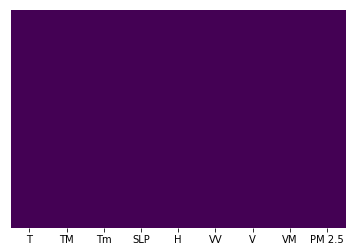

In [4]:
#Checking for NULL values
df.isnull()
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis')

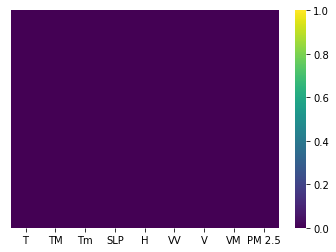

In [5]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=True,cmap='viridis')

#### If it contain any NULL values the drope it or replace it with mean or mode according to requirements

In [6]:
df = df.dropna()

In [8]:
df.shape

(549, 9)

In [9]:
X = df.iloc[:,:-1] #Independent feature
Y = df.iloc[:,-1] #Dependent feature

#### Multivariate Analysis

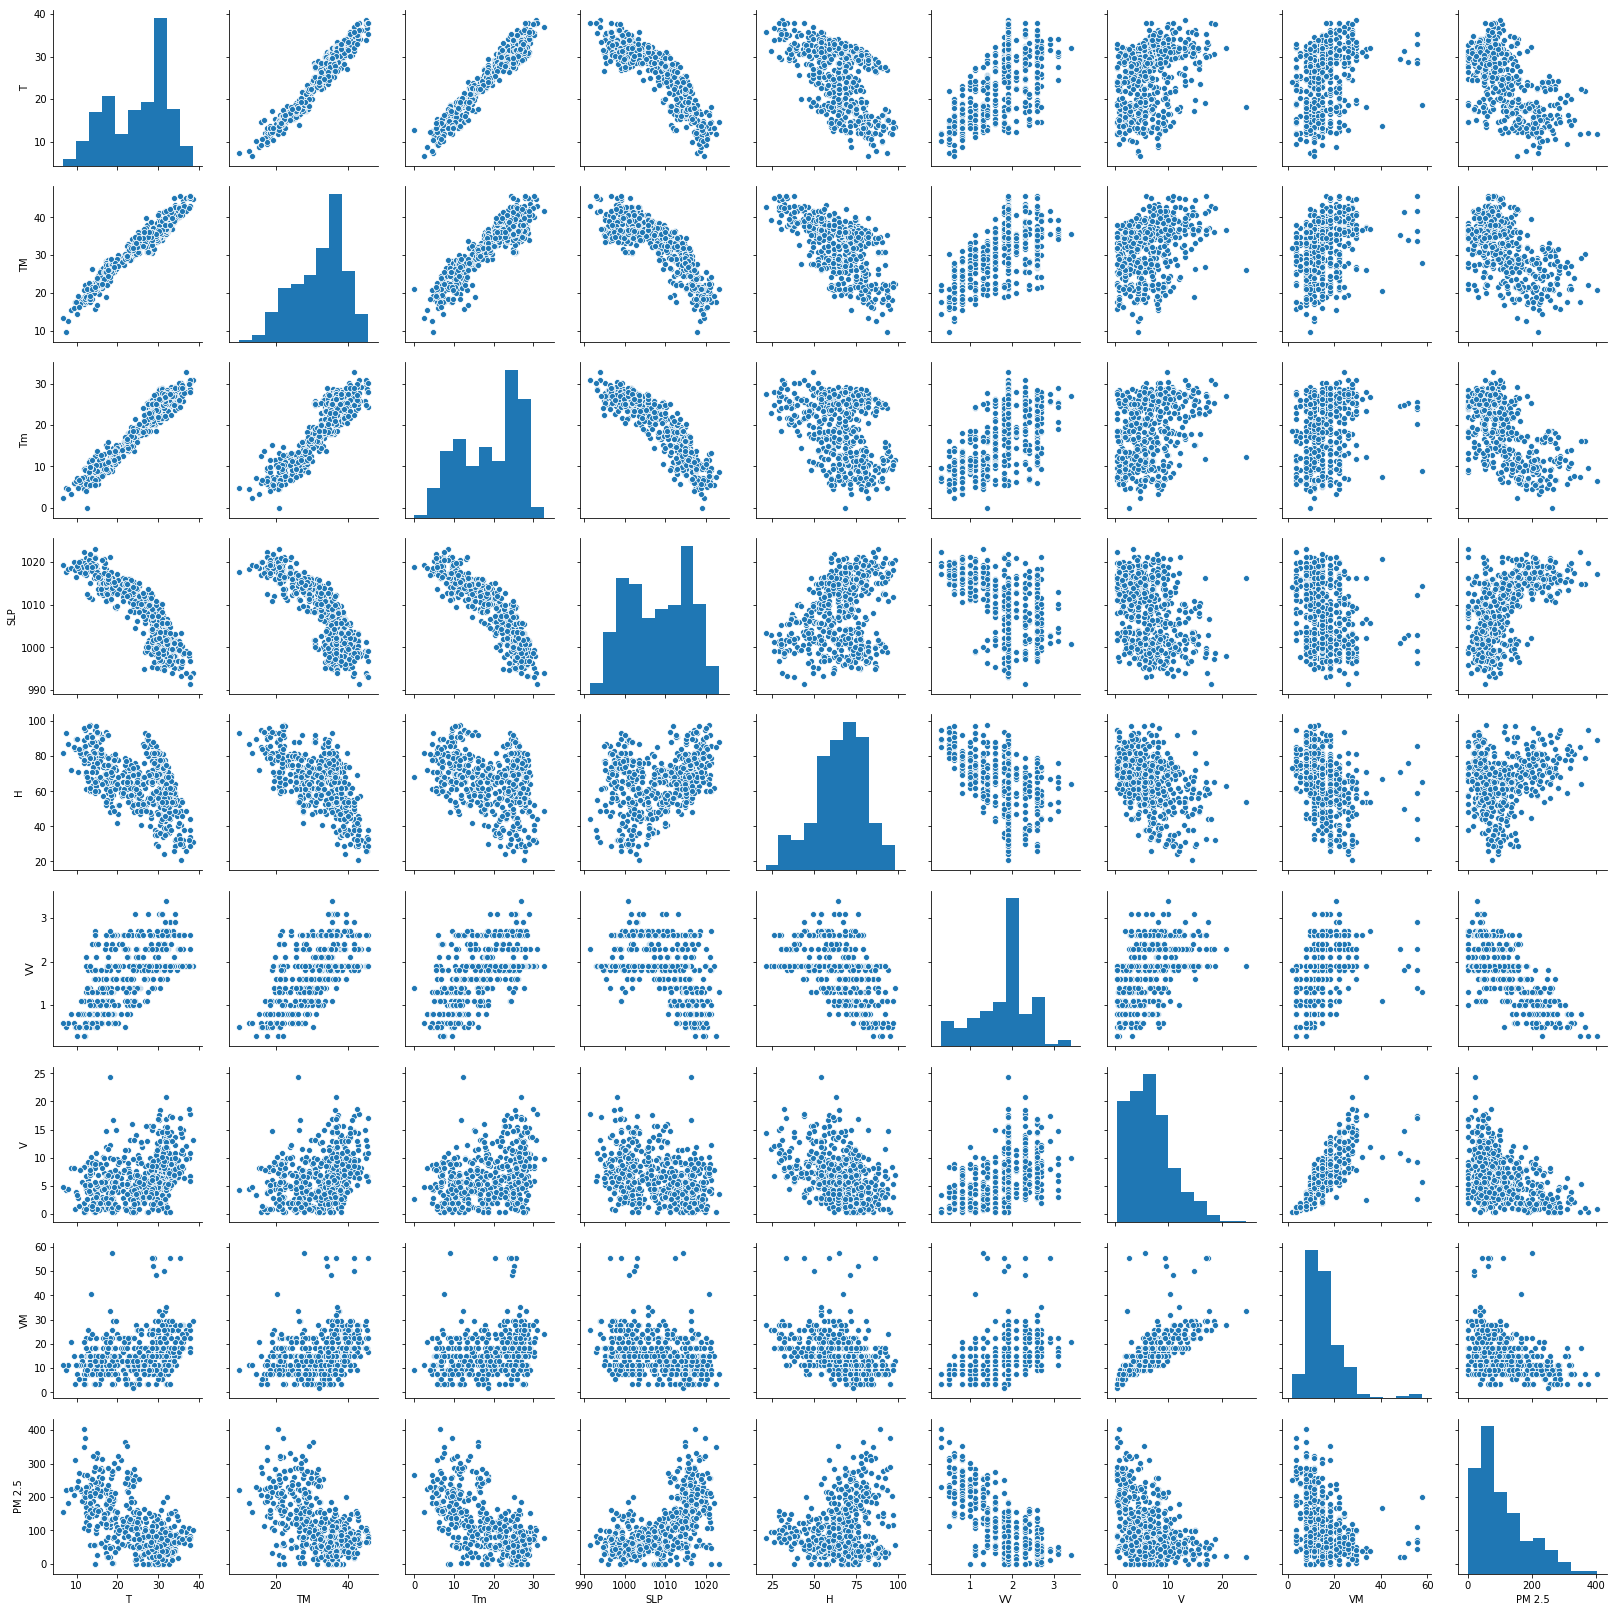

In [10]:
sns.pairplot(df)

In [12]:
#Pearson Correlation
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967862,0.965157,-0.889020,-0.524467,0.608045,0.346485,0.286482,-0.629898
TM,0.967862,1.000000,0.901475,-0.835683,-0.612395,0.605626,0.342980,0.301275,-0.573447
Tm,0.965157,0.901475,1.000000,-0.901673,-0.342549,0.555229,0.327737,0.252748,-0.665778
SLP,-0.889020,-0.835683,-0.901673,1.000000,0.308668,-0.476347,-0.361016,-0.290194,0.608924
H,-0.524467,-0.612395,-0.342549,0.308668,1.000000,-0.480948,-0.416193,-0.380964,0.217851
VV,0.608045,0.605626,0.555229,-0.476347,-0.480948,1.000000,0.443132,0.367184,-0.729767
V,0.346485,0.342980,0.327737,-0.361016,-0.416193,0.443132,1.000000,0.748162,-0.441617
VM,0.286482,0.301275,0.252748,-0.290194,-0.380964,0.367184,0.748162,1.000000,-0.350197
PM 2.5,-0.629898,-0.573447,-0.665778,0.608924,0.217851,-0.729767,-0.441617,-0.350197,1.000000


### Correlation Matrix with Heatmap

- Correlation states how the features are related to each other or the target variables.

- Correlation can be positive(increase in one value of feature increase the target variable) or Negative(increase in one value of feature decrease the values of the target variable)

- Heatmap makes it easy to identify which feture are most related to the target variable, We will plot heatmap of correlated feature using the seaborn library.

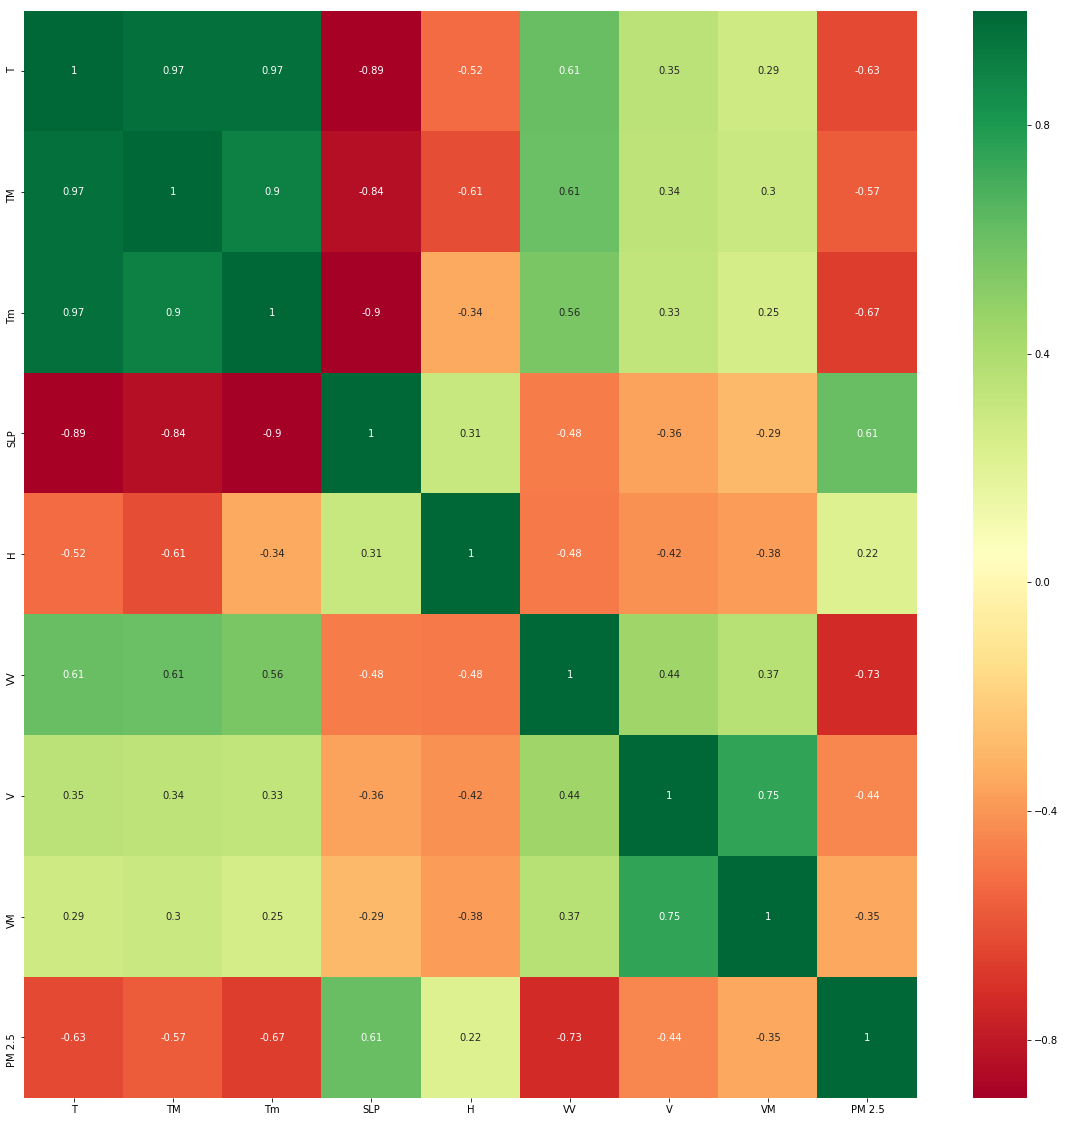

In [13]:
#get correlations of each feture in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#Plot heat map
g= sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [14]:
top_corr_features

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance

- You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

- Feature importance gives you a score for each feature of your data, the higher the score more importance or relevent is the feature towards your output variables.

- Feature importace is an inbuild class that comes with Tree based Regressor, we will be using Extra Tree Regressor for extractiing the top 10 features for the dataset.

In [16]:
from sklearn.ensemble import ExtraTreesRegressor

In [17]:
model = ExtraTreesRegressor()
model.fit(X,Y)

C:\Users\AKSHU\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [21]:
#Feature importance for each columns
print(X.columns)
print(model.feature_importances_)

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM'], dtype='object')
[0.10927837 0.08649546 0.20711401 0.06142244 0.06309869 0.37668049
 0.06027459 0.03563595]


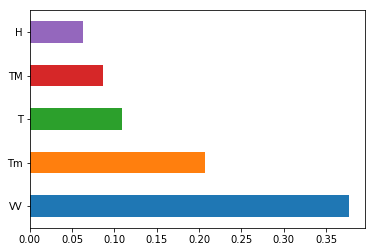

In [22]:
#Ploting graph of feature importance for better visualization
feat_importances = pd.Series(model.feature_importances_, index= X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\AKSHU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


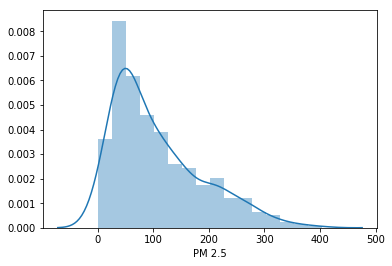

In [23]:
#Checking  our output feature is distrubuteed
sns.distplot(Y)

### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)


In [25]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
regressor.coef_

array([  2.7319499 ,   2.64070171,  -7.48524911,   1.15488162,
        -0.63558202, -77.49857089,  -2.59053108,  -0.24226125])

In [32]:
regressor.intercept_

-868.6553607585752

In [26]:
print("Coefficent of Determination R^2 <--> on train set: {}".format(regressor.score(X_train,y_train)))

Coefficent of Determination R^2 <--> on train set: 0.6991794878334725


In [27]:
print("Coefficent of Determination R^2 <--> on train set: {}".format(regressor.score(X_test,y_test)))

Coefficent of Determination R^2 <--> on train set: 0.6750384684194826


In [28]:
#Cross validation method
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor, X,Y,cv=4)

In [30]:
score.mean()

0.6398608191540565

### Model Evaluation

In [33]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,2.731950
TM,2.640702
Tm,-7.485249
SLP,1.154882
H,-0.635582
VV,-77.498571
V,-2.590531
VM,-0.242261


#### Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in T is associated with an decrease of 2.731950 in AQI PM2.5 .
- Holding all other features fixed, a 1 unit increase in TM is associated with an increase of 2.640702 in AQI PM 2.5 .

In [34]:
prediction = regressor.predict(X_test)

C:\Users\AKSHU\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


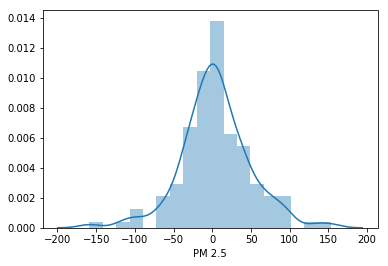

In [35]:
sns.distplot(y_test-prediction)

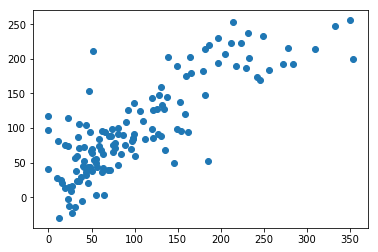

In [36]:
plt.scatter(y_test,prediction)

### Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [37]:
from sklearn import metrics

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 32.87219276937773
MSE: 2064.6114799337447
RMSE: 45.43799599381276


### Saving our model

In [39]:
import pickle

In [40]:
# open a file, where you ant to store the data
file = open('regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)